# Numerical Simulation Laboratory

## Exercise 1 

## Exercise 01.1
Testare il parallel RNG determinando la media, la varianza e il chi quadrato di un set di numeri casuali.

### <font color='blue'> Valore medio </font>
Osserviamo che il valor medio atteso della successione di numeri casuali generati in modo uniforme sull'intervallo $[0,1)$ è dato da 
    $$\langle r \rangle = \int_0^1 r dr = 1/2 \,.$$
Il grafico qui sotto riporta il valore medio ottenuto utilizzando il metodo delle **medie a blocchi** per una distibuzione di $10^5$ valori casuali, i quali sono stati suddivisi in $100$ blocchi distinti. La stima del valore medio è ottenuta tramite medie progressive su blocchi successivi e la corrispondente incertezza è data dalla deviazione standard della media. Come si può osservare, utilizzando un elevato numero di misure, il valore medio è compatibilie con il valore atteso e la barra di errore tende man mano a ridursi

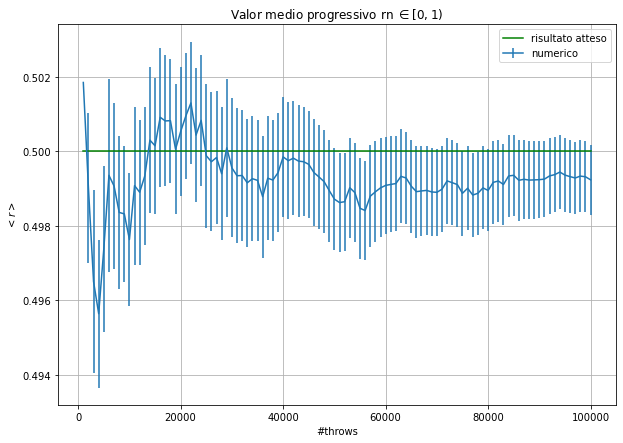

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
x,y,err=np.loadtxt('./data/meanr.dat', delimiter = ' ', unpack = 'True')

yatt=0.5*x**0  #valore atteso

plt.errorbar(x,y,yerr=err, label='numerico') #grafico simulazione
plt.plot(x,yatt, color='green', label='risultato atteso') #grafico risultato atteso
plt.title('Valor medio progressivo rn $\in [0,1)$')
plt.xlabel('#throws')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

### <font color='blue'> Varianza</font>
In maniera simile, la varianza attesa per una tale distribuzione è data da 
    $$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \,.$$
Analogamente al caso presedente si calcola numericamente la quantità utilizzando il metodo delle **medie a blocchi** sempre per $10^5$ valori casuali suddivisi in $100$ blocchi distinti. La stima della varianza è ottenuta tramite medie progressive su blocchi successivi e la corrispondente incertezza è data dalla deviazione standard della media. Si può osservare come, anche ben prima degli ultimi valori, la varianza converge al valore atteso.

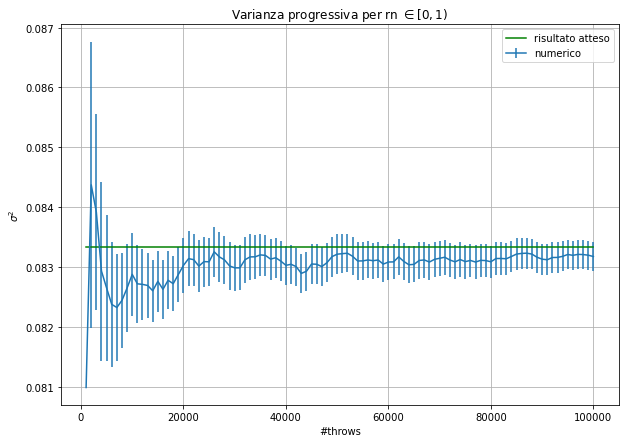

In [3]:
plt.figure(figsize=(10,7))
x,y,err=np.loadtxt('./data/varr.dat', delimiter = ' ', unpack = 'True')

yatt=1/12*x**0  #varianza attesa 

plt.errorbar(x,y,yerr=err, label='numerico') #grafico simulazione
plt.plot(x,yatt, color='green', label='risultato atteso') #grafico risultato atteso
plt.title('Varianza progressiva per rn $\in [0,1)$')
plt.xlabel('#throws')
plt.ylabel('$\sigma ^2$')
plt.legend()
plt.grid(True)

### <font color='blue'> Test $\chi^2$</font>
Questo test mi da un'indicazione quantitativa di quanto la successione di valori casuali si distribuisca come mi aspetto che faccia (cioè uniformemente in questo caso): è una misura dell'errore tra valori osservati e attesi.
    $$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{\sigma ^2}$$
Se divido in molti sottointervalli uguali ($M$) l'intervallo $[0,1)$ ho che la probabilità attesa di ogni rn di cadere in un dato sottointervallo è piccola $p=1/M$. Allora utilizzando la distribuzione binomiale si può dimostrare che in questi casi
    $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} \,,$$
dove $n_i$ indica il numero di valori che cadono nell' $i$-esimo intervallo, $n$ è il numero di valori generati per la stima di $\chi^2$. 
Avendo suddiviso l'intervallo in $100$ sottointervalli equiprobabili e avendo utilizzato $10^4$ valori casuali per ciascuna stima, il valore atteso è $\chi^2 \simeq 100$. 
Il grafico sottostante riporta $100$ stime del *chi quadrato* ottenute iterando tale procedimento: come è possibile osservare, il valore oscilla intorno al valore atteso mostrando che la distribuzione di valori casuali è uniforme durante tutto il processo di generazione.

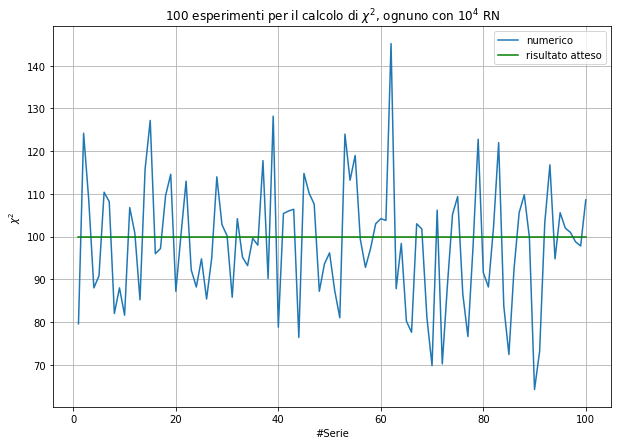

In [6]:
plt.figure(figsize=(10,7))
x,y=np.loadtxt('./data/chi2.dat', delimiter = ' ', unpack = 'True')

yatt=100*x**0  #chi2 atteso 

plt.plot(x,y, label='numerico') #grafico simulazione
plt.plot(x,yatt, color='green', label='risultato atteso') #grafico risultato atteso
plt.title('100 esperimenti per il calcolo di $\chi^2$, ognuno con $10^4$ RN')
plt.xlabel('#Serie')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid(True)

## Exercise 01.2

Determino la media $S_N$ di $N$ numeri casuali determinati secondo le distribuzioni di probabilità uniforme, esponenziale e Lorentziana:
    $$S_N = \frac{1}{N} \sum_{i=1}^N x_i \quad N=1,2,10,100 \,. $$

### <font color='blue'> Distribuzione uniforme</font>
Generando $10^5$ valori casuali distribuiti in modo uniforme nell'intervallo $[0,1]$ posso determinarne la media $S_N$ al variare di $N=1,2,10,100$. I risultati ottenuti sono qui riportati in forma di istogramma e per il caso $N=100$ è stato effettuato un *fit* dei dati con una curva gaussiana. Si può osservare che c'è un ottimo accordo tra l'istogramma e la curva gaussiana i cui parametri ottenuti dai dati sono $\mu=0.50036$ e $\sigma=0.02895$.

mu = 0.5003638264
sigma = 0.02895080855095524


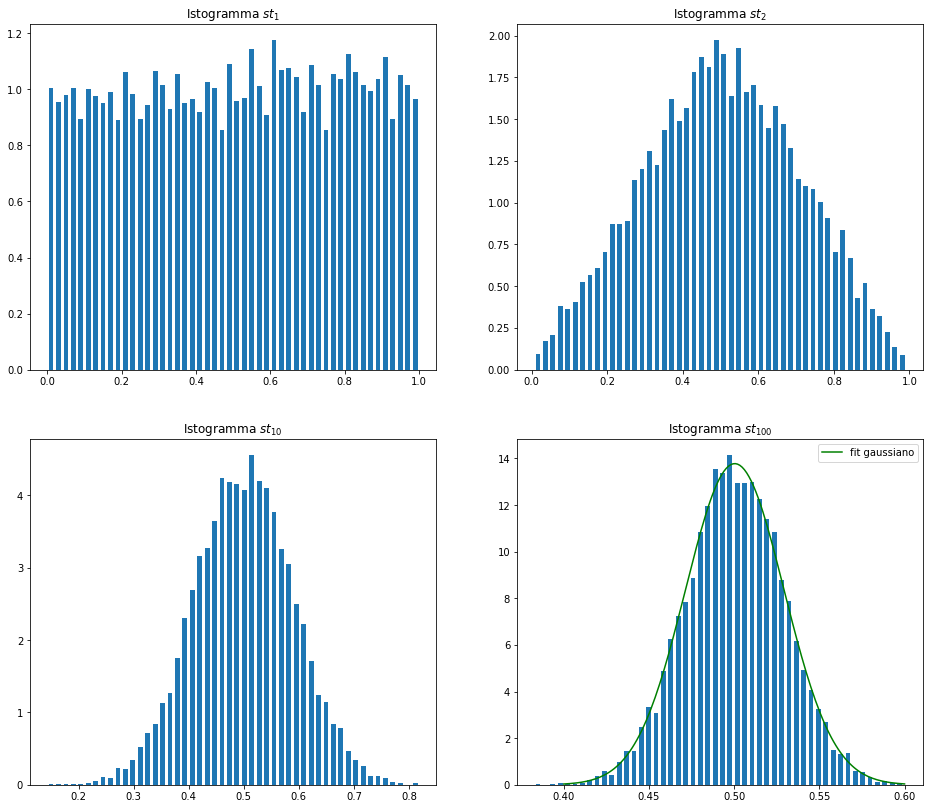

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#importo i dati relativi all'istogramma uniforme
st1, st2, st10, st100 = np.loadtxt('./data/standard.dat')

st2/=2
st10/=10
st100/=100 #normalizzo l'intervallo delle ascisse (medio)

x = np.linspace(0.4, 0.6, 150, endpoint=True)
mu, sigma = norm.fit(st100)  #ottengo mu, sigma dal fit dei dati
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(st1, bins=50, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $st_1$")

plt.subplot(222)
plt.hist(st2, bins=50, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $st_2$")

plt.subplot(223)
plt.hist(st10, bins=50, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $st_{10}$")

plt.subplot(224)
plt.hist(st100, bins=50, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='green', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $st_{100}$")
plt.legend()

print("mu =",mu)
print("sigma =",sigma)
plt.show()

### <font color='blue'> Distribuzione esponenziale</font>
Implemento nel generatore di numeri casuali un metodo in grado di generare numeri casuali distribuiti secondo la seguente distribuzione di probabilità esponenziale:
    $$p(x) = \lambda \exp(-\lambda x) \quad x\in [0;+\infty] \,.$$
Riesco ad ottenerla utilizzando il **metodo dell'inversa della cumulativa**: se la funzione cumulativa di distribuzione è analiticamente invertibile, posso ottenere una tale densità di probabilità a partire da una variabile casuale $y$ distribuita in modo uniforme sull'intervallo $[0,1)$ applicando la seguente equazione:
$$ x = -\frac{1}{\lambda} \ln \left( 1-y \right) \,.$$
Genero in questo modo $10^5$ valori casuali distribuiti come $p(x)$ e posso calcolare la media (e anche varianza volendo) di $expo_N$ al variare di $N=1,2,10,100$. Anche in questo caso vale il teorema del limite centrale e lo vedo osseervando l'accordo tra l'istogramma $expo_{100}$ e un fit gaussiano: c'è un buon accordo tra l'istogramma e la curva gaussiana i cui parametri ottenuti dai dati sono $\mu=1.00097$ e $\sigma=0.10034$.

mu = 1.000974397
sigma = 0.10034346038868498


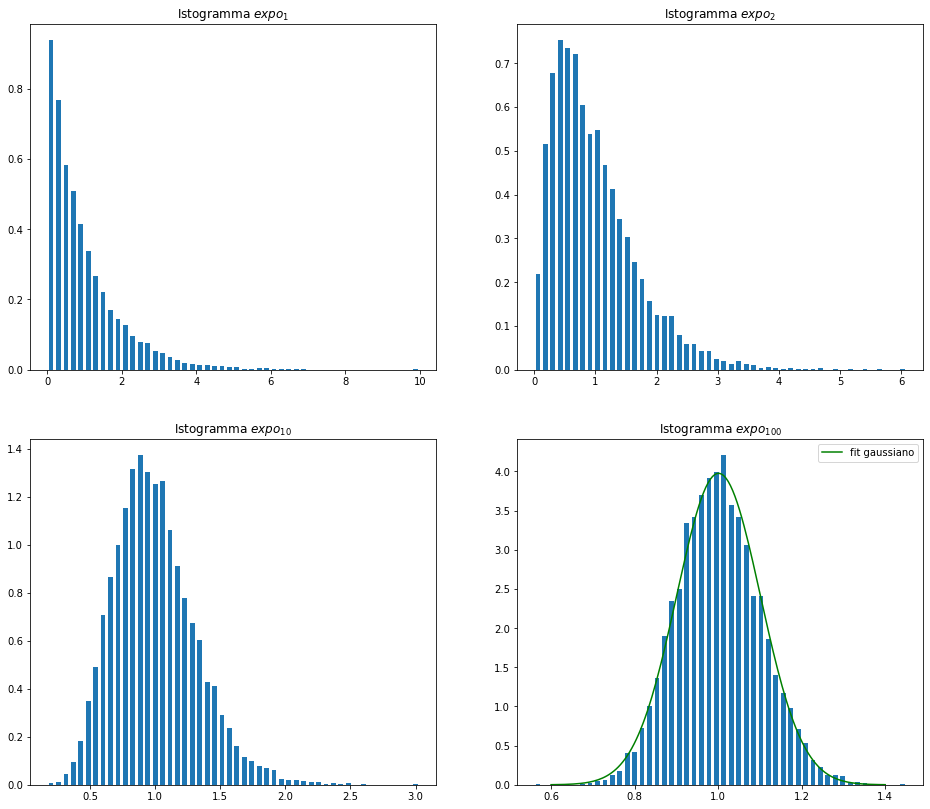

In [8]:
st1, st2, st10, st100 = np.loadtxt('./data/exponential.dat')

st2/=2
st10/=10
st100/=100 #normalizzo l'intervallo delle ascisse (medio)

x = np.linspace(0.6, 1.4, 150, endpoint=True)
mu, sigma = norm.fit(st100)  #ottengo mu, sigma dal fit dei dati
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(st1, bins=50, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $expo_1$")

plt.subplot(222)
plt.hist(st2, bins=50, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $expo_2$")

plt.subplot(223)
plt.hist(st10, bins=50, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $expo_{10}$")

plt.subplot(224)
plt.hist(st100, bins=50, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='green', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $expo_{100}$")
plt.legend()

print("mu =",mu)
print("sigma =",sigma)
plt.show()

### <font color='blue'> Distribuzione lorentziana</font>
Implemento nel RNG un metodo in grado di generare numeri casuali distribuiti secondo la seguente distribuzione di probabilità Lorentziana:
    $$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2} \quad x\in [-\infty;+\infty]$$
ancora utilizzando il **metodo dell'inversa della cumulativa**, ottengo una tale distribuzione a partire da una variabile casuale $y$ distribuita in modo uniforme sull'intervallo $[0,1)$ applicando:
    $$ x = \mu + \Gamma \tan \left[\pi \left(y-\frac{1}{2}\right) \right] $$
Genero in questo modo $10^5$ valori casuali distribuiti come $p(x)$ e posso calcolare la media (e anche varianza volendo) di $expo_N$ al variare di $N=1,2,10,100$. Per questa funzione la varianza non rimane finita e quindi non si può applicare il CLT: in effetti la lorentziana stessa è una distribuizone limite, e qui lo vedo bene osservando l'accordo tra istogramma e lorentziana con paramentri calcolti dai dati; c'è un buon accordo tra l'istogramma e la curva lorentziana, i cui parametri ottenuti dai dati sono $\mu=-0.02927$ e $\Gamma=0.9983$.
Si noti come fittare i dati per una gaussiana porti a una curva del tutto diversa, molto schiacciata nel grafico proprio perchè la varianza inizia a diventare grande

mu = -0.029272851343827365
Gamma = 0.9982934436874298
muGauss = 1.5327893879206003
sigma = 76.27003882639853


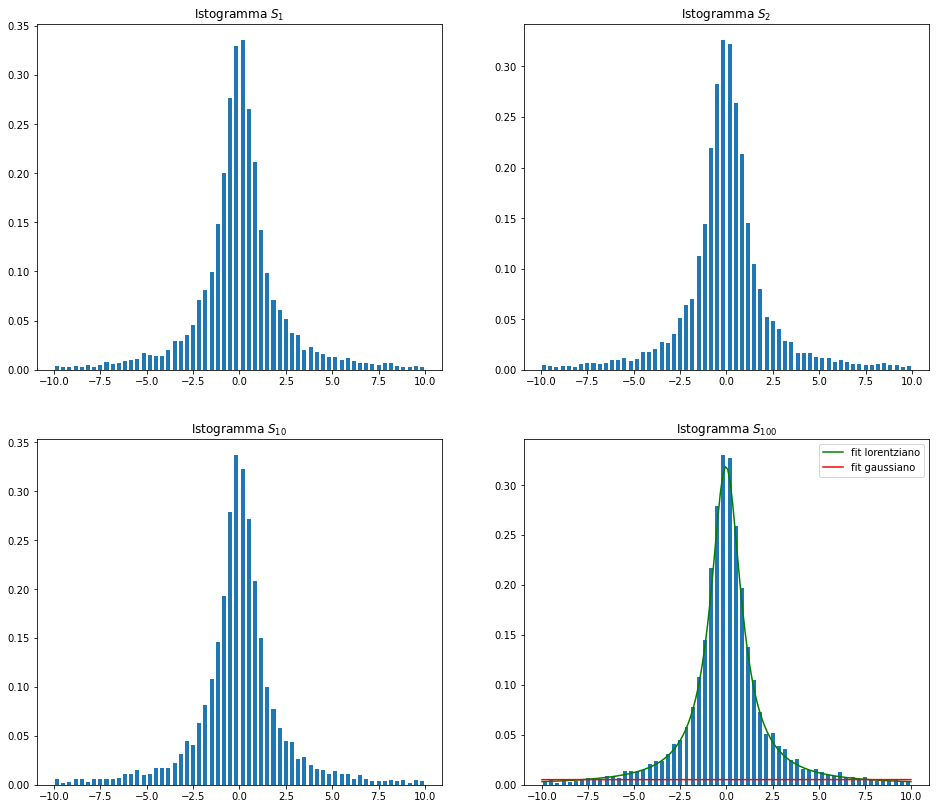

In [9]:
import array as arr
from scipy.stats import cauchy

st1, st2, st10, st100 = np.loadtxt('./data/lorentzian.dat')

st2/=2
st10/=10
st100/=100 #normalizzo l'intervallo delle ascisse (medio)

nbins=60  #numero di bins-1 per ogni istogramma
xleft=-10 #estremi delle ascisse per il grafico
xright=10
bins_edge = arr.array('d')  #evito che l'asse delle ascisse sia ideale, quindi tutto R
for i in range(nbins+1):    #aggiungo un bin qui
    bins_edge.append(xleft+i*(xright-xleft)/nbins)

x = np.linspace(xleft, xright, 150, endpoint=True)
mu, Gamma = cauchy.fit(st100)  #ottengo mu, Gamma dal fit dei dati
y = cauchy.pdf(x, mu, Gamma)   #Lorentziana media=mu, larghezza Gamma

muGauss, sigma = norm.fit(st100)  #confronto anche con una gaussiana
yGauss = norm.pdf(x, muGauss, sigma)

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(st1, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $S_1$")

plt.subplot(222)
plt.hist(st2, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $S_2$")

plt.subplot(223)
plt.hist(st10, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $S_{10}$")

plt.subplot(224)
plt.hist(st100, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='green', label='fit lorentziano') #fit con la lorentziana
plt.plot(x,yGauss, color='red', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $S_{100}$")
plt.legend()

print("mu =",mu)
print("Gamma =",Gamma)
print("muGauss =",muGauss)
print("sigma =",sigma)
plt.show()

## Exercise 01.3

Per stimare il valore di $\pi$ attraverso l'esperimento dell'ago di Buffon, genero una serie di coppie di valori casuali unidimensionali $(x,\theta)$ che descrivono la posizione di un ago di lunghezza $L$ in un campo in cui le righe si trovano a distanza $d$ ($d\geq L$ ma non troppo, se no ho convergenza lenta).
- $x$ è la distanza tra il centro dell'ago e la riga più vicina ad esso. Nella simulazione numerica data la simmetria del problema è stata posta la riga nell'origine $\longrightarrow x \in (-d/2,d/2)$ generato uniformemente
- $\theta$ indica l'angolo casuale formato tra l'ago e la perpendicolare alle righe del campo. Nella simulazione numerica corrisponde ad un valore generato uniformemente nell'intervallo $[0,\frac{\pi}{2}]$.

![Needleproblem](./img/needleproblem.jpg)

All'interno della simulazione, per evitare di usare il valore $\pi$, è possibile determinare $\theta$ (o equivalentemente $cos(\theta)$, $sin(\theta)$) attraverso una tecnica di rigetto: genero una coppia $(x,y)$ di punti casuali in $(-1,1)$ (quindi nel quadrato centrato nell'origine di lato 2), se il punto è nel cerchio inscritto calcolo l'angolo rispetto all'ascissa e le sue funzioni usando quel punto, altrimnti rigetto e genero un nuovo punto.

In questo modello, la **condizione di intersezione** tra l'ago e la riga è data da:
$$ x \leq \frac{1}{2}L \cos(\theta)  \,.$$
Se simulo $N_{tot}$ lanci di aghi e determino che si ha intersezione per $N_{hit}$ volte allora posso stimare il valore di $\pi$ attraverso la seguente equazione:

$$ \pi = \frac{2LN_{tot}}{N_{hit}d} \,.$$

Si è utilizzato nuovamente il metodo delle **medie a blocchi** per calcolare valor medio e le incertezze statistiche al variare del numero di lanci simulati. Sono stati utilizzati $100$ blocchi in totale di $10^5$ lanci ciascuno e i seguenti valori per definire la geometria del problema:
- Lunghezza ago $L=1$
- Spaziatura tra le righe del campo $d=1.4$

Si può osservare che all'aumentare del numero di lanci simulati, la stima di $\pi$ converge al valore esatto.

Pi greco:  3.14159
Stima della simulazione dopo 10^5 lanci:  3.13666


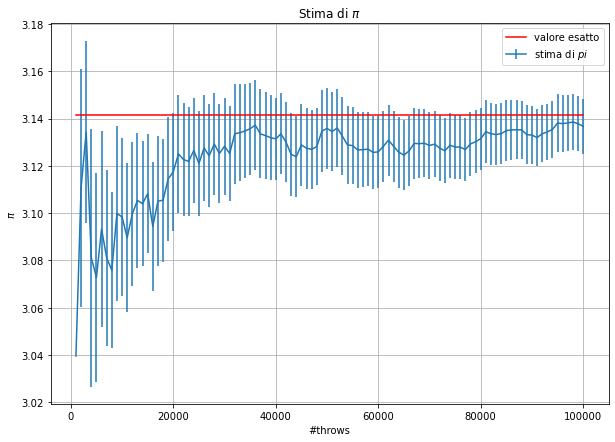

In [11]:
import math
plt.figure(figsize=(10, 7))
x,pi,err=np.loadtxt('./data/buffon.dat', delimiter = ' ', unpack = 'True')

y = math.pi*x**0 #risultato esatto
plt.errorbar(x, pi, yerr=err, label='stima di $pi$') #grafico valori medi progressivi
plt.plot(x, y, color='red', label='valore esatto') #grafico del risultato esatto

print("Pi greco: ", round(math.pi,5) )
print("Stima della simulazione dopo 10^5 lanci: ", round(pi[len(pi)-1],5) )

plt.title('Stima di $\pi$')
plt.xlabel('#throws')
plt.ylabel('$\pi$')
plt.legend()
plt.grid(True)